# Mass and spin distributions

In [1]:
%matplotlib inline

In [82]:
import numpy as np
import h5py
import seaborn as sns
import pandas as pd
import kde_contour
sns.set_palette('colorblind')

Download and untar GW231123 posterior samples from [GWOSC](https://gwosc.org/eventapi/html/O4_Discovery_Papers/GW231123_135430/v1/)

In [ ]:
!wget -nc -O posterior_samples.tar.gz https://zenodo.org/api/records/16004263/files/posterior_samples.tar.gz/content
!tar -xzf posterior_samples.tar.gz

Load posterior samples for the preferred waveform (`NRSur`) and all waveforms combined (`Combined`).

In [20]:
posterior_samples = {}
with h5py.File('posterior_samples.h5', 'r') as f:
    posterior_samples['NRSur'] = f['C00:NRSur7dq4']['posterior_samples'][()]
    posterior_samples['Combined'] = f['C00:Mixed']['posterior_samples'][()]


## Plot masses and spins

Plot inferred black hole masses and spins.

/Users/maxisi/src/gw231123-posteriors/kde_contour.py:274: UserWarning: The following kwargs were not used by contour: 'auto_bound'
  ax.contour(XS, YS, ZS, levels=lev, **kws)
/Users/maxisi/src/gw231123-posteriors/kde_contour.py:274: UserWarning: The following kwargs were not used by contour: 'auto_bound'
  ax.contour(XS, YS, ZS, levels=lev, **kws)


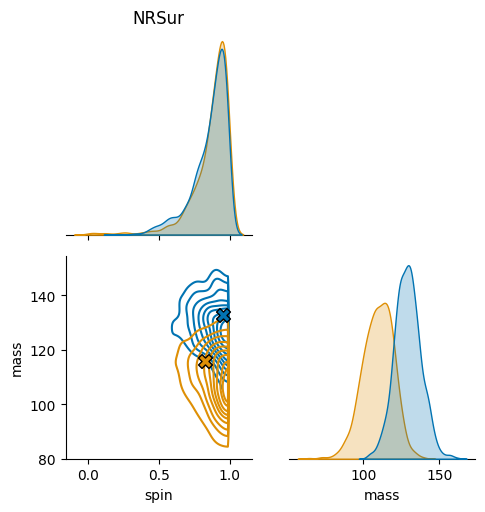

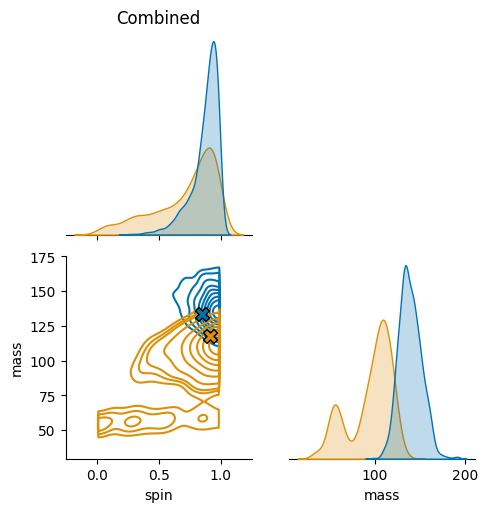

In [ ]:
for k, samples in posterior_samples.items():
    fig, ax = plt.subplots()
    g = plot_mass_spin_kde(samples)
    g.axes[0, 0].set_title(k);

/Users/maxisi/src/gw231123-posteriors/kde_contour.py:274: UserWarning: The following kwargs were not used by contour: 'auto_bound'
  ax.contour(XS, YS, ZS, levels=lev, **kws)
/Users/maxisi/src/gw231123-posteriors/kde_contour.py:274: UserWarning: The following kwargs were not used by contour: 'auto_bound'
  ax.contour(XS, YS, ZS, levels=lev, **kws)


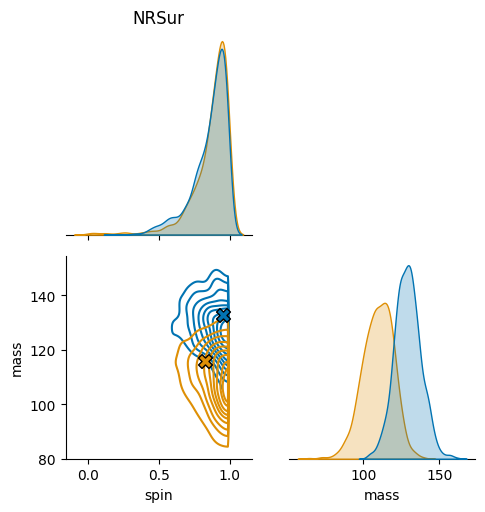

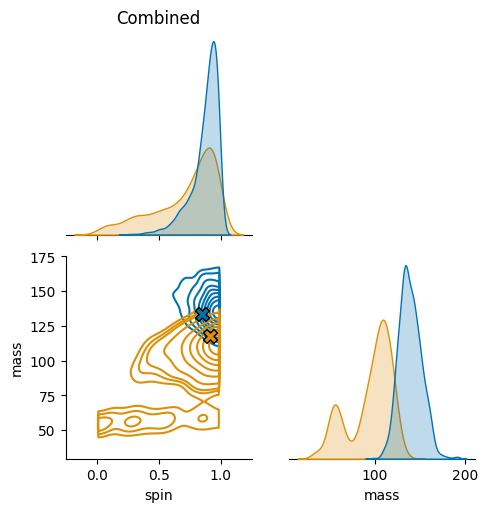

In [ ]:
for k, samples in posterior_samples.items():
    fig, ax = plt.subplots()
    g = plot_mass_spin_kde(samples)
    g.axes[0, 0].set_title(k);

In [86]:
def plot_mass_spin(samples, n=4000, alpha=0.5):
    # subselect samples for plotting
    idxs = np.random.choice(len(samples), size=n, replace=False)

    dfs = [
        pd.DataFrame({
            'mass': samples[f'mass_{i}_source'][idxs],
            'spin': samples[f'a_{i}'][idxs],
            'component': i
        })
        for i in [1, 2]
    ]
    df = pd.concat(dfs, ignore_index=True)

    g = sns.jointplot(df, x='spin', y='mass', hue='component', kind='hist',
                    palette='colorblind', alpha=alpha,
                    marginal_kws={'element': 'step', 'palette': 'colorblind'})

    kde_contour.kdeplot(x=samples['a_1'][idxs], y=samples['mass_1_source'][idxs], x_max=1, color='C0')
    kde_contour.kdeplot(x=samples['a_2'][idxs], y=samples['mass_2_source'][idxs], x_max=1, color='C1')

    # plot maximum posterior value
    maxl = samples[(samples['log_likelihood']+samples['log_prior']).argmax()]
    g.ax_joint.scatter(maxl['a_1'], maxl['mass_1_source'], s=100, marker='X',
                       color='C0', edgecolor='white', zorder=100)
    g.ax_joint.scatter(maxl['a_2'], maxl['mass_2_source'], s=100, marker='X',
                       color='C1', edgecolor='white', zorder=100)
    return g

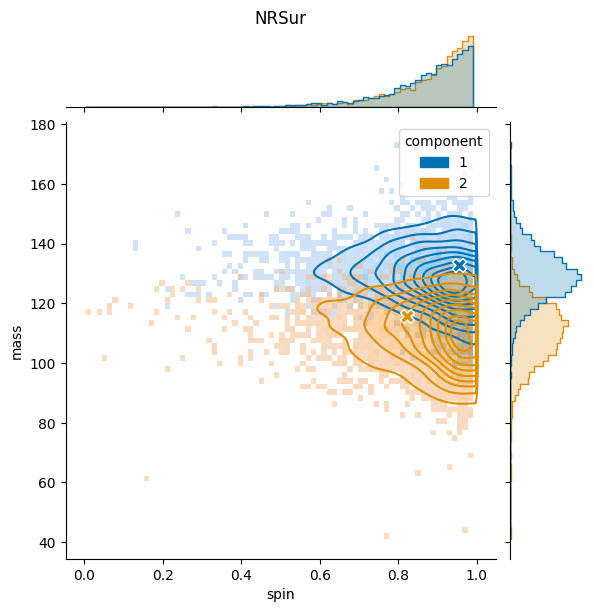

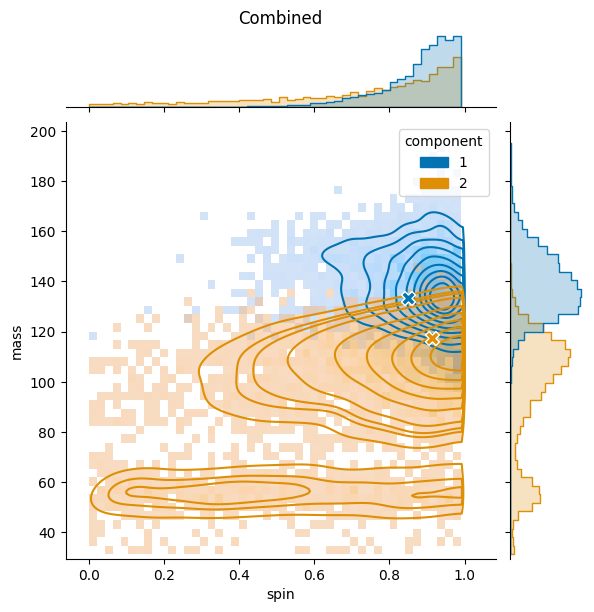

In [87]:
for k, samples in posterior_samples.items():
    g = plot_mass_spin(samples)
    g.ax_marg_x.set_title(k);